In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import linear_model
from sklearn import preprocessing, decomposition, neighbors, metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.collections import LineCollection

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Présentations et Analyses descriptive du fichier 'billets'

In [2]:
df_billets = pd.read_csv('billets.csv', delimiter = ";") #chargement du fichier 
df_billets #affichage des données contenues du fichier

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


Text(0.5, 1.0, 'Taux des vrais et faux billets')

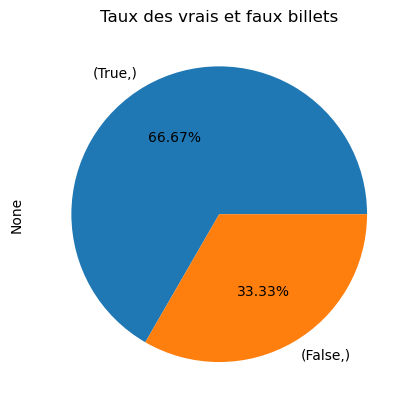

In [3]:
# afficher les taux de faux billets et des vrais billets
df_billets[['is_genuine']].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Taux des vrais et faux billets')

<h5> valeurs manquantes: </h5>

In [4]:
df_billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Il n'y a pas de valeurs aberantes :

In [5]:
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


**On trouve dans ce fichier des variables telles que :**
- is_genuine : indique si le billet est vrai ou faux ;
- diagonal : la mesure de la diagonale du billet en mm ;
- height_left : hauteur du billet mesurée sur le côté gauche en mm ;
- height_right :  hauteur du billet mesurée sur le côté droit en mm;
- margin_low : marge entre le bord inférieur du billet et l'image de celui-ci en mm ;
- margin_up : marge entre le bord supérieur du billet et l'image de celui-ci en mm;
- length : indique la longueur du billet en mm.

<h5> utilisation de la méthode de régression linéaire pour traiter les valeurs manquantes: </h5>

quelles sont les corrélations entre les variables (en supprimant les valeurs Na) ?

In [6]:
df_billets.iloc[:, 1:].corr()

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


# Séparation en deux df (avec NaN et sans NaN) 

In [7]:
# valeurs manquantes 
df_billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
# df sans les NaN : 
billets_ss_nan = df_billets.dropna()
billets_ss_nan.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [9]:
# df avec seulement les NaN
nan = df_billets.iloc[np.where(df_billets['margin_low'].isna())[0],:] 
nan.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [10]:
nan.shape

(37, 7)

In [11]:
# on a à present 2 df l'un sans les NaN et l'autre avec les NaN (de la colonne margin_low)
#  on souhaite prédire la valeur de 'margin_low' en fonction des autres variables avec la regression linaire multiple
# cela nous sera utiles pour pouvoir combler les valeurs manquantes ds le df d'origine 'df_billets'

# Régression linéaire multiple

### Visualisations des variables

In [12]:
# Je crée une matrice de corrélation afin d'étudier la corrélation entre mes variables
billets_ss_nan.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


### heatmap:

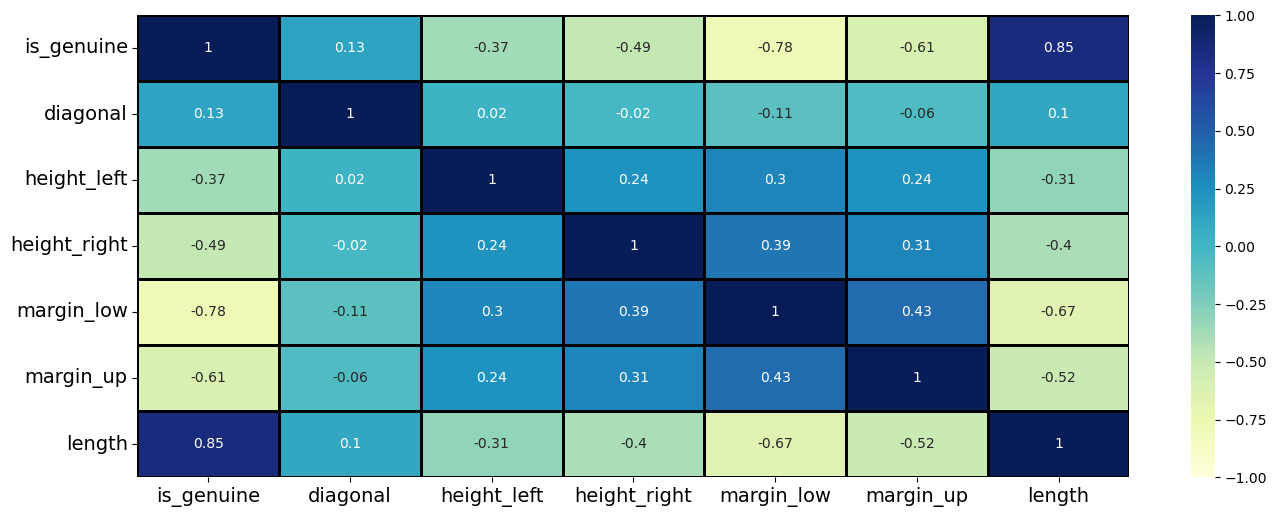

In [13]:
# Création d'un graphique de la matrice de correlation pour une meilleure lisibilité
matrice_corr = billets_ss_nan.corr().round(2)
plt.figure(figsize=(16, 6))

sns.heatmap(data=matrice_corr, annot=True,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1)
plt.yticks(rotation=0,fontsize = 14) 
plt.xticks(rotation=0,fontsize = 14,va="top") 
plt.show()

On peut constater que les variables 'height_left' et 'height_right' sont corrélées positivement entre elles, alors que la variable 'margin_low' et 'lenght' sont corrélées négativement

In [14]:
# Application de la régression linéaire 
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets_ss_nan).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.75e-299
Time:                        17:34:05   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

on ne conserve uniquement les variables dont P<0.05

In [15]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets_ss_nan).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.24e-304
Time:                        17:34:05   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

## Calcul des leviers

In [16]:
alpha = 0.05

In [17]:
n = billets_ss_nan.shape[0]
p = 3

In [18]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

In [19]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

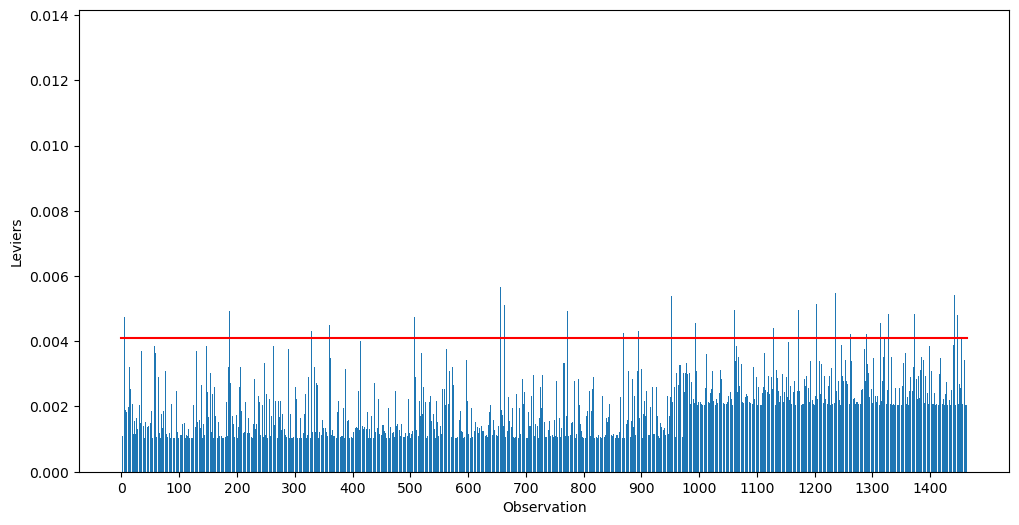

In [20]:
plt.figure(figsize=(12,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_levier, seuil_levier], color='r')
plt.show()

In [21]:
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
4,5,0.004748
48,49,0.007353
52,53,0.010647
54,55,0.004408
123,124,0.005865
...,...,...
1441,1442,0.005428
1442,1443,0.004406
1444,1445,0.004648
1446,1447,0.004796


## Calcul des résidus studentisés

In [22]:
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

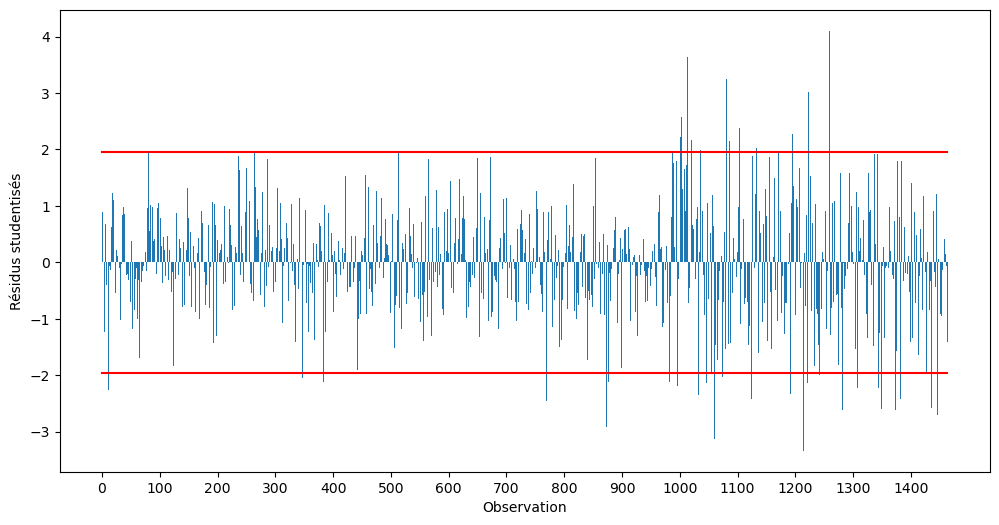

In [23]:
plt.figure(figsize=(12,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1463], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1463], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

## Calcul de la distance de Cook

In [24]:
influence = reg_multi.get_influence().summary_frame()

In [25]:
#Le seuil de la distance de Cook est de n-p
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 2/(n-p)

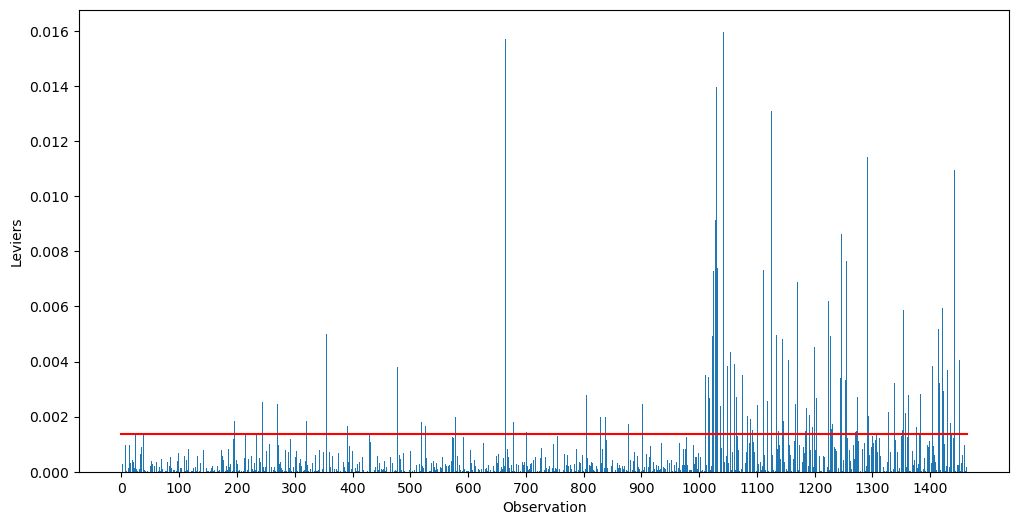

In [26]:
plt.figure(figsize=(12,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1463, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_dcook, seuil_dcook], color='r')
plt.show()

Avant de retirer des points nous devons vérifier qu'ils sont effectivement atypiques, voire aberrants, au vu du modèle estimé.

## Vérification de la colinéarité des variables

In [27]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007746]

ici les deux coefficients de nos variables sont inférieurs à 10, il n'y a donc pas de problème de colinéarité

## Vérification de l’homoscédasticité
On peut également tester l’homoscédasticité (=la constance de la variance) des résidus à l'aide du test de Breush Pagan

In [28]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115838186e-36


La p-valeur ici n'est pas inférieure à  5 %, on ne rejette pas l'hypothèse nulle selon laquelle les variances sont constantes 

## Vérification la normalité des résidus

on vérifie avec un test de Shapiro

In [29]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

ici la pvalue est supérieure à 0.05, l'échantillon semble donc Gaussiens

## Imputation des valeurs manquantes

In [30]:
# Remplacement des valeurs manquantes par la prédiction de la régression multiple
billets = df_billets
billets.loc[nan.index,('margin_low')] = reg_multi.predict(nan).round(2)
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [31]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [32]:
# Vérification si les valeurs manquantes sont bien remplacées par une interpolation 
billets.loc[nan.index]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.07,3.25,112.79
99,True,171.93,104.07,104.18,4.10,3.14,113.08
151,True,172.07,103.80,104.38,4.12,3.02,112.93
197,True,171.45,103.66,103.80,4.00,3.62,113.27
241,True,171.83,104.14,104.06,4.12,3.02,112.36
251,True,171.80,103.26,102.82,4.14,2.95,113.22
284,True,171.92,103.83,103.76,4.08,3.23,113.29
334,True,171.85,103.70,103.96,4.13,3.00,113.36
410,True,172.56,103.72,103.51,4.10,3.12,112.95
413,True,172.30,103.66,103.50,4.09,3.16,112.95


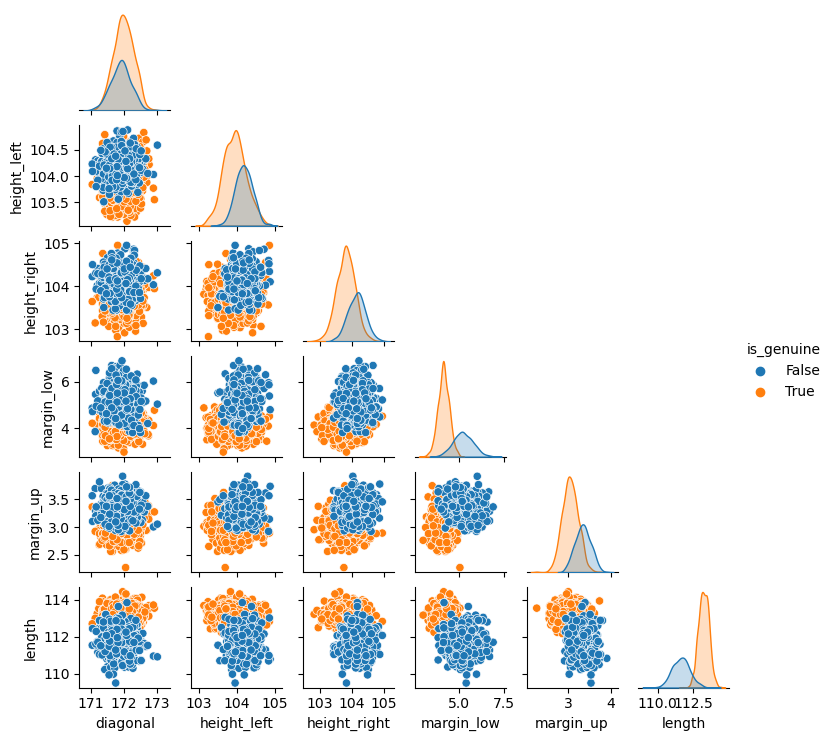

In [33]:
sns.pairplot(billets, hue='is_genuine',height=1.25, corner=True)

In [34]:
billets.to_csv('billets_comp.csv')

# ACP

## réalisation d'une ACP afin d'avoir une projection de mes données:

In [35]:
# Préparation des données pour l'ACP
X = billets.drop(columns=["is_genuine"]).values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.05628359, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.0807076 , -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.125635  , -0.91256208,
         0.55190114],
       ...,
       [-0.51931643, -0.06524991,  0.61346228,  1.55711197,  0.89984645,
        -0.83501554],
       [ 0.3328817 ,  0.83666863,  0.42914097,  1.04167596,  1.33137229,
        -0.4911519 ],
       [-1.6009525 ,  0.40241156, -0.30814427,  0.2230423 ,  0.94299904,
        -0.69747008]])

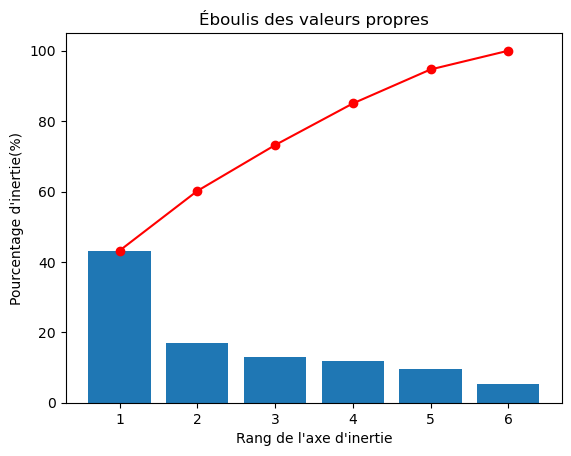

In [36]:
# Éboulis des valeurs propres

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie(%)")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)

# Nombre de composants souhaités
n_comp = 6

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

display_scree_plot(pca)
plt.show()

In [37]:
# Proportion de variance expliquée
pca.explained_variance_ratio_

array([0.43204615, 0.16957139, 0.130199  , 0.11825181, 0.09667101,
       0.05326065])

Cet éboulis indique que F1 et F2 ont une grande inertie d'environ 60%. On va donc s'intéresser aux axes F1 et F2.

## Cercle de corrélations:

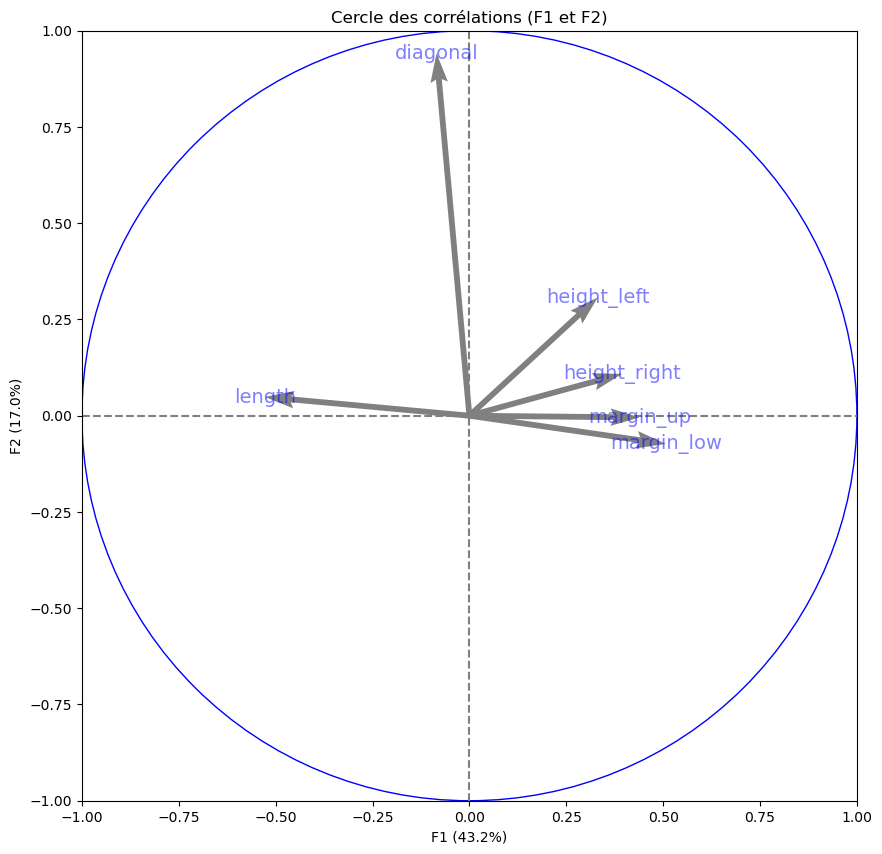

In [38]:
from matplotlib.collections import LineCollection

# Définition de la fonction pour le graphique Cercle de corrélation


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10, 10))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# Cercle des corrélations

n_comp = 2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1)],
                labels=np.array(billets.columns[1:7]))

plt.show()

Analyse du cercle des corrélations:  
La diagonale des billets semble être très corrélée à la dimension 2  
Les height et margin sont corrélées entre elles mais assez faiblement avec la dimension 1  
On remarque aussi une anti-corrélation de la length sur la dimension 1

# Projection des individus sur le plan factoriel

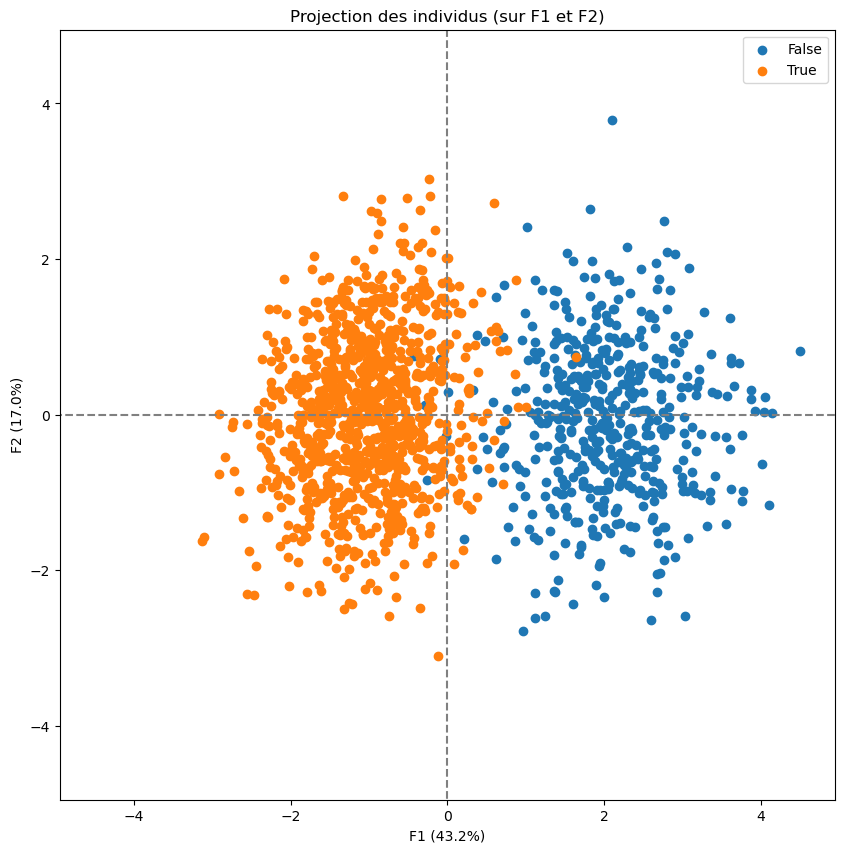

In [39]:
# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# Projection des individus sur F1 et F2
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [
                         (0, 1)], illustrative_var=billets.is_genuine)

on remarque une réelle distinction entre les vrais et faux billets sur cette projection

## Régression Logistique

In [40]:
# Création du modèle de régression logistique
reg_log1 = smf.glm('margin_low~is_genuine+margin_up', data=df_billets, family=sm.families.Binomial()).fit()

print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             margin_low   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1497
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 13 Sep 2023   Deviance:                   3.9692e+05
Time:                        17:34:25   Pearson chi2:                 8.49e+19
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.441e+16   3.16

C:\Users\camille.amiel\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\camille.amiel\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1015: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


In [41]:
#valeurs caractéristiques et valeur cible
X = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']].values
y = billets['is_genuine']
y=y.astype('int')


#fraction de la df 
x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.75,random_state=0)

#instanciation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0,solver='liblinear')

#training
modele_regLog.fit(x_train,y_train)

#précision du modèle
precision = modele_regLog.score(x_test,y_test)
print(precision*100)

99.73333333333333


In [42]:
modele_regLog.predict_proba(x_test)

array([[2.32229987e-02, 9.76777001e-01],
       [5.40236297e-03, 9.94597637e-01],
       [8.58689686e-01, 1.41310314e-01],
       [9.73228271e-02, 9.02677173e-01],
       [9.99947225e-01, 5.27749271e-05],
       [9.93034111e-01, 6.96588902e-03],
       [8.04548196e-02, 9.19545180e-01],
       [6.55839745e-03, 9.93441603e-01],
       [7.66772288e-04, 9.99233228e-01],
       [9.91220778e-01, 8.77922225e-03],
       [9.99046689e-01, 9.53311036e-04],
       [9.99986353e-01, 1.36465664e-05],
       [9.97536788e-01, 2.46321174e-03],
       [1.13908292e-02, 9.88609171e-01],
       [7.89419795e-04, 9.99210580e-01],
       [1.34585497e-03, 9.98654145e-01],
       [9.96882409e-01, 3.11759097e-03],
       [9.97625324e-01, 2.37467559e-03],
       [2.66491167e-04, 9.99733509e-01],
       [9.88531398e-01, 1.14686021e-02],
       [4.67925663e-04, 9.99532074e-01],
       [1.26172710e-04, 9.99873827e-01],
       [3.47486004e-03, 9.96525140e-01],
       [3.02326208e-02, 9.69767379e-01],
       [9.999316

In [43]:
# Matrice de confusion
confusion_matrix(y_test, modele_regLog.predict(x_test))

array([[125,   1],
       [  0, 249]], dtype=int64)

In [44]:
#J'affiche un rapport de classification
print(classification_report(y_test, modele_regLog.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       126
           1       1.00      1.00      1.00       249

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



# La courbe ROC 
La courbe ROC représente la sensibilité (taux de positifs classés positifs) en fonction de la spécificité(taux de négatifs classés négatifs). Elle représente graphiquement la relation entre le taux de vrais positifs (True Positive Rate, TPR) et le taux de faux positifs (False Positive Rate, FPR) à différents seuils de classification.

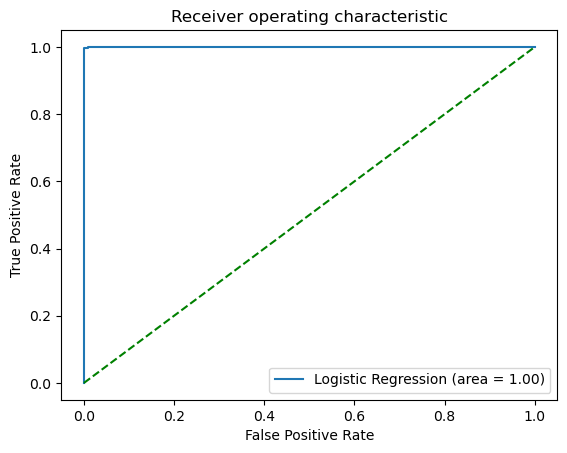

In [45]:
# Création d'une courbe ROC
logit_roc_auc = roc_auc_score(y_test, modele_regLog.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, modele_regLog.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Ici la courbe ROC se rapproche du coin supérieur gauche du graphique, indiquant un TPR élevé et un FPR faible pour tous les seuils de classification. Plus la courbe ROC est proche de la diagonale (correspondant à une performance aléatoire), moins le modèle est performant. Ici le modèle semble donc très performant

# KMEANS

In [46]:
billets.shape

(1500, 7)

C:\Users\camille.amiel\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


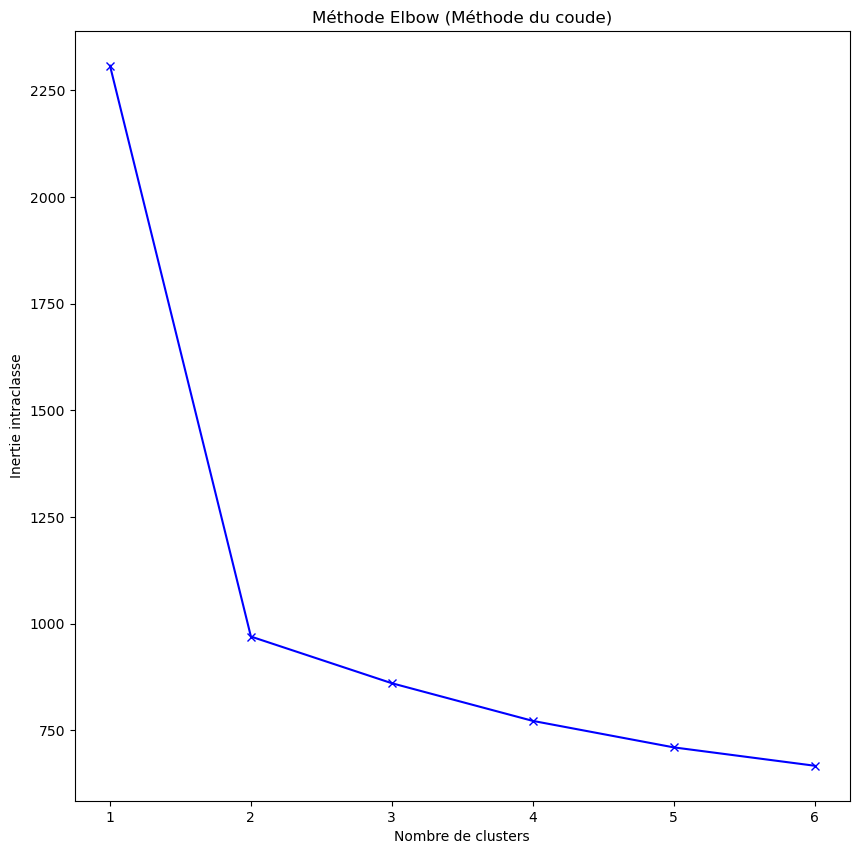

In [47]:
#définition du nombre de clusters avec la méthode Elbow
a = []
for i in range(1, 7):
    km = KMeans(n_clusters=i)
    km.fit(X)
    a.append(km.inertia_)
fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, 7), a, 'bx-')
plt.title('Méthode Elbow (Méthode du coude)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intraclasse')
plt.show()

In [48]:
# Nombre de clusters souhaités
n_clust = 2
X = x_test
#X = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']].values
#y = billets['is_genuine']

# Clustering par K-means
km = KMeans(n_clusters=n_clust,random_state=0)
km.fit (X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [49]:
#Création d'une PCA pour projeter les données et observer les clusters avec le module decomposition
pca_kmeans = decomposition.PCA(n_components=6).fit(X)
X_projected = pca_kmeans.transform(X)

In [50]:
# J'enregistre les centroïds pour les projeter
centroids = km.cluster_centers_
centroids_projected = pca_kmeans.transform(centroids)

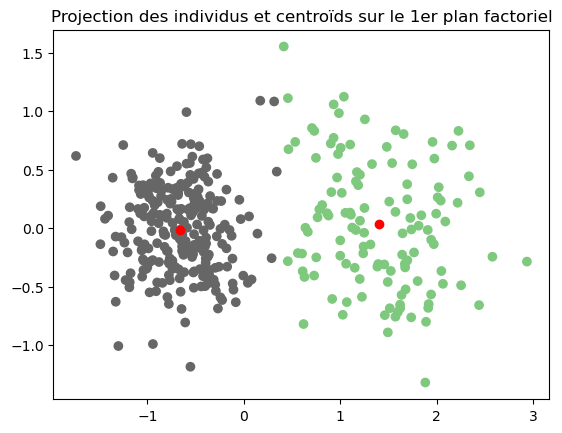

In [51]:
# Affichage du clustering par projection des individus et centroïds sur le premier plan factoriel
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters,cmap='Accent')
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], color='red')
plt.title("Projection des individus et centroïds sur le 1er plan factoriel")
plt.show()

In [52]:
# J'utilise la fonction predict pour prédire y en fonction de x.
y_pred_kmean = km.predict(X)

In [53]:
# Affichage de la matrice de confusion
print("ConfusionMatrix",confusion_matrix(y_test,y_pred_kmean))
print(classification_report(y_test,y_pred_kmean))

ConfusionMatrix [[121   5]
 [  0 249]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       126
           1       0.98      1.00      0.99       249

    accuracy                           0.99       375
   macro avg       0.99      0.98      0.98       375
weighted avg       0.99      0.99      0.99       375



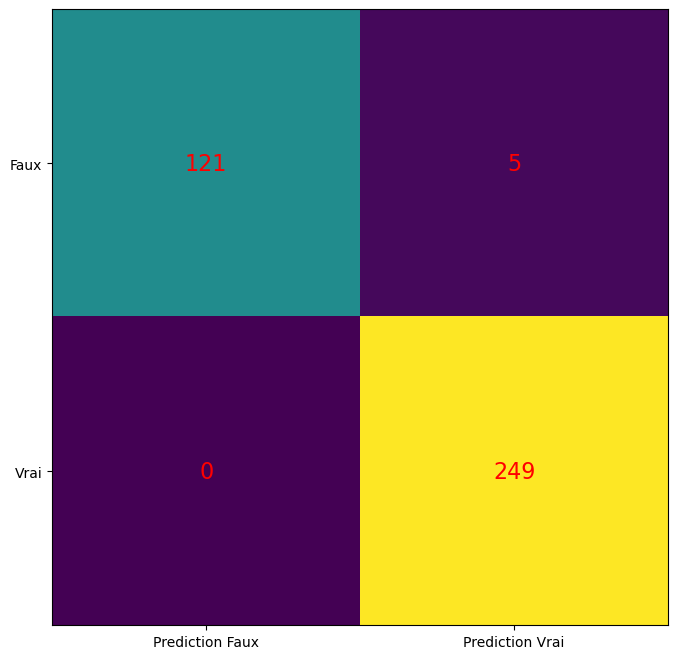

In [54]:
#Création d'un graphique de la matrice de confusion
cm = confusion_matrix(y_test,y_pred_kmean)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm,cmap='viridis')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Prediction Faux', 'Prediction Vrai'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Faux', 'Vrai'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], fontsize=16,ha='center',va='center', color='red')
plt.show()

On remarque que les clusters sont aussi très similaire par rapport à la distinction de vrai et faux billets vu plus haut. On peut donc déduire que cluster 0 = faux billet, et cluster 1 = vrai billet

# Algorithme Régression Logistique

In [61]:
test = pd.read_csv('billets_test.csv')
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [62]:
# Je crée une première fonction qui va me permettre de tester mon fichier avec les deux algorithmes
def test_billet_RegLog(test) : 
    
    # Je crée une copie 
    X_final = test.iloc[:,:-1]
       
    # J'applique la prédiction par regression logistique
    res = modele_regLog.predict(X_final.values)
    res_proba = modele_regLog.predict_proba(X_final.values)[:,1]
    
    # Je crée une liste dans laquelle j'indique que si la valeur de i est supérieure à 0.5 il prendra la valeur de True
    predict=[]
    for i in res_proba:
        if i >= 0.5 : predict.append(True)
        else : predict.append(False)
    
    # Je crée un colonne qui affiche la prédiction en % et une autre qui affiche la réponse
    test["prediction_% relog"]=res_proba
    test["Réponse reglog"]=predict  

    return(test[["id", "prediction_% relog", "Réponse reglog"]].set_index('id'))

In [63]:
print(test_billet_RegLog(test))

     prediction_% relog  Réponse reglog
id                                     
B_1            0.988497            True
B_2            0.010147           False
B_3            0.998875            True
B_4            0.000215           False
B_5            0.014651           False


# Algorithme Kmeans

In [58]:
def rech_faux_billets_KM(nom_fichier_csv):
    billets = pd.read_csv('billets_comp.csv',index_col = 'Unnamed: 0')
    variables = billets.columns.drop('is_genuine')
    data = billets[variables]
    target = billets['is_genuine']
    atester3 = pd.read_csv(nom_fichier_csv)
    X = data.values

    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    km = KMeans(n_clusters=2, random_state=1)
    km.fit(X_scaled)

    billets_KM = billets.copy()
    billets_KM['clusters'] = km.labels_
    
    centroid = billets_KM.drop(columns='is_genuine').groupby(by='clusters').mean()
    centroid.index = ['False', 'True']
    F = list(centroid.loc['False', :])
    T = list(centroid.loc['True', :])

    atester3['is_genuine']=0
    for i in atester3.index:
        coord = list(atester3[variables].loc[i,:])
        Z = math.dist(coord, F)-math.dist(coord, T)
        if Z >= 0:
            atester3.loc[i, 'is_genuine'] = 1
        else:
            atester3.loc[i, 'is_genuine'] = 0
    atester3['is_genuine'] = atester3['is_genuine'].astype('bool')            
    return atester3[['id', 'is_genuine']]

In [60]:
rech_faux_billets_KM('billets_production.csv')

,id,is_genuine
0,A_1,False
1,A_2,False
2,A_3,False
3,A_4,True
4,A_5,True
